Session 2: Jeans Mass

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Explore numerically the value of the critical mass as a function of temperature and box size.
Use T = $10^4$ K and L = $10$ kpc as a starting point, and explore parameter space varying these. Use these results to derive a function that links mass, temperature, and length.

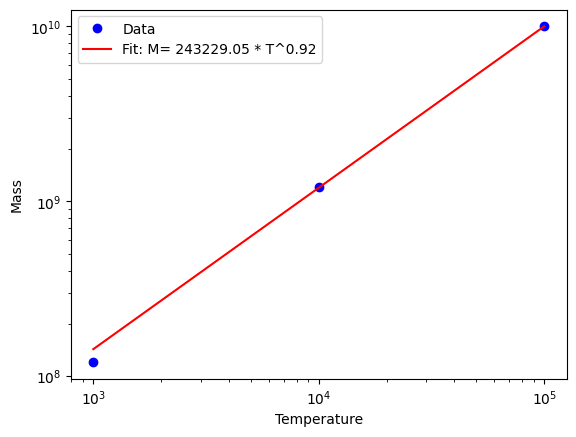

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_func (T, A, alpha):
  return A*T**alpha

data = pd.read_csv('/content/drive/MyDrive/Hands on Sessions/HoS2/Collassi_min_L_fix.txt', sep=r'\s+', header=0)

data = pd.DataFrame(data)
M = data['Mass']
T = data['Temperature']

params, covariance = curve_fit(fit_func, T, M, p0=[1e6,1])
A, alpha = params

T_fit = np.linspace(T.min(), T.max(),)
M_fit = fit_func(T_fit, A, alpha)

plt.plot(T, M, 'o', color = 'blue', label = 'Data')
plt.plot(T_fit, M_fit, color = 'red', label = f'Fit: M= {A:.2f} * T^{alpha:.2f}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature')
plt.ylabel('Mass')
plt.legend()
plt.show()

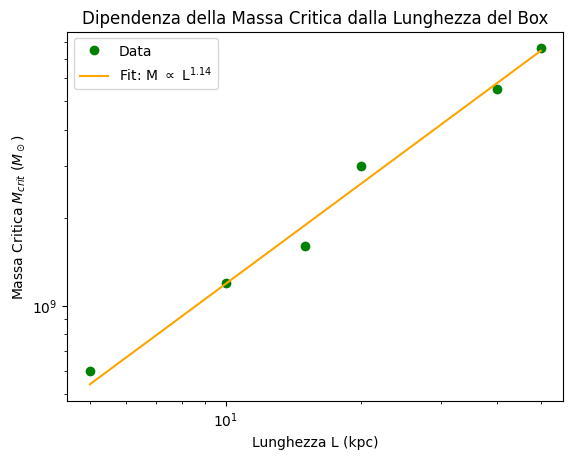

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_func_L(L, A_double_prime, beta):
    return A_double_prime * L**beta

data_L = pd.read_csv('/content/drive/MyDrive/Hands on Sessions/HoS2/Collassi_new_L.txt', sep=r'\s+', header=0)

M_L = data_L['Mass']
L = data_L['Lenght']

params_L, covariance_L = curve_fit(fit_func_L, L, M_L, p0=[1e7, 1.5])
A_double_prime, beta = params_L

L_fit = np.linspace(L.min(), L.max(),)
M_fit_L = fit_func_L(L_fit, A_double_prime, beta)

plt.plot(L, M_L, 'o', color = 'green', label = 'Data')
plt.plot(L_fit, M_fit_L, color = 'orange', label = f'Fit: M $\\propto$ L$^{{{beta:.2f}}}$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lunghezza L (kpc)')
plt.ylabel('Massa Critica $M_{crit}$ ($M_\\odot$)')
plt.legend()
plt.title('Dipendenza della Massa Critica dalla Lunghezza del Box')
plt.show()

Derive a scaling relation that links the critical mass at which the box collapses to the temperature and length of the box, starting from the definition of Jeans’ mass and assuming an ideal
gas. Compare with the numerical results obtained above.


At what density does a typical GMC start to form stars? At what gas fraction does a $10^{11} M_⊙$
galaxy form stars? Verify your calculation numerically.
